# **Learn to Build a Polynomial Regression Model from Scratch**

## **Approach**

* Data Preprocessing
  * Outlier removal
  * Imputing null values
  * Onehot encoding
* Model Building
  * Linear regression model building
  * Polynomial regression model building
* Model Evaluation
  * Evaluation of model on test data
  * Discussion on various regression matrix-like R-squared, AIC,
F-statistics

## **Install Packages**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# python version 3.8.10
# If using Google Colab, restart runtime for updated libraries
!pip install catboost==1.0.4 --quiet
!pip install category_encoders==2.4.0 --quiet
!pip install japanize_matplotlib==1.1.3 --quiet
!pip install matplotlib==3.4.3 --quiet
!pip install matplotlib_venn==0.11.6 --quiet
!pip install numpy==1.21.5 --quiet
!pip install packaging==21.3 --quiet
!pip install pandas==1.3.5 --quiet
!pip install scikit_learn==1.0.2 --quiet
!pip install seaborn==0.11.2 --quiet
!pip install tqdm==4.62.3 --quiet
!pip install xgboost==1.5.2 --quiet
!pip install ipywidgets==7.7.0 --quiet
!pip install lightgbm==3.3.2 --quiet
!pip install projectpro --upgrade --quiet

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sys
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

import projectpro
projectpro.checkpoint('78ae27')


In [2]:
#reading data
data = pd.read_csv("https://s3.amazonaws.com/projex.dezyre.com/polynomial-regression-model-in-python-from-scratch/materials/NBA_Dataset_csv.csv")

In [3]:
#view top 3 entries
data.head()

,Team,Points_Scored,Weightlifting_Sessions_Average,Yoga_Sessions_Average,Laps_Run_Per_Practice_Average,Water_Intake,Players_Absent_For_Sessions
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


In [4]:
# shape of the data
print("Dimension of the dataset is= ",data.shape)

Dimension of the dataset is=  (159, 7)


In [5]:
# columns of data
data.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

## **Data Dictionary**

* Team: name of the team
* Points_Scored: points scored by the team
* Weightlifting_Sessions_Average: weighlifting sessions on an average done by the team
* Yoga_Sessions_Average: yoga sessions on an average done by the team
* Laps_Run_Per_Practice_Average: laps run on an average by the team
* Water_Intake: total water intake
* Players_Absent_For_Sessions: number of players absent for sessions



In [6]:
# info of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


There are total 159 rows and 7 columns in the NBA Dataset.

Observe that there are a few null values in the dataset.

Learn about Essential basic functionality for pandas dataframe [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html#basics-dtypes). 



In [7]:
# renaming required columns
df=data.rename(columns={'Points_Scored':'Points','Weightlifting_Sessions_Average':'WL','Yoga_Sessions_Average':'Yoga',
                        'Laps_Run_Per_Practice_Average':'Laps','Water_Intake':'WI',
                        'Players_Absent_For_Sessions':'PAFS'})
projectpro.checkpoint('78ae27')

In [8]:
# top rows post renaming the columns
df.head()

,Team,Points,WL,Yoga,Laps,WI,PAFS
0,Lakers,242,23.0,25.0,30.0,5.0,4.0
1,Lakers,144,24.0,26.0,31.0,5.0,8.0
2,Lakers,156,24.0,27.0,31.0,5.0,7.0
3,Lakers,159,26.0,29.0,34.0,5.0,1.0
4,Lakers,106,27.0,NaN,34.0,5.0,6.0


d:\PROJECTS\poly_reg\polynomial_regression\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot for Points')

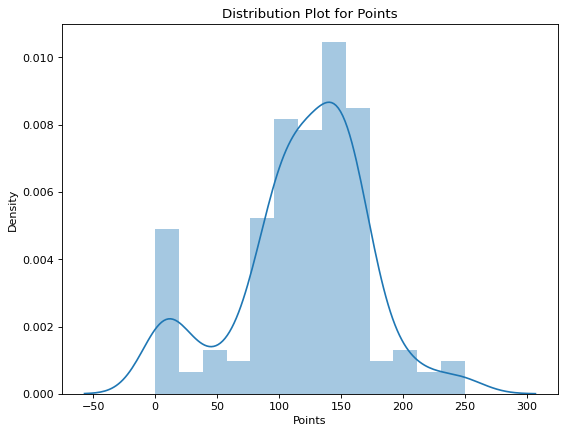

In [9]:
#DistPlot
figure(figsize=(8, 6), dpi=80)
ax=sns.distplot(df.Points)
plt.xlabel("Points")
plt.ylabel("Density")
plt.title("Distribution Plot for Points")

d:\PROJECTS\poly_reg\polynomial_regression\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot for Square Root of Points')

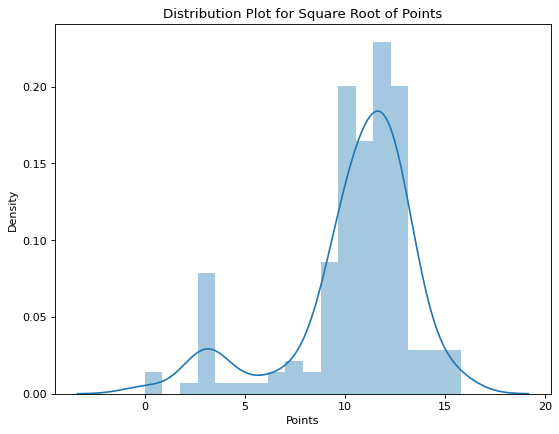

In [10]:
#distplot can be replaced with displot
figure(figsize=(8, 6), dpi=80)
ax=sns.distplot(np.sqrt(df.Points))
plt.xlabel("Points")
plt.ylabel("Density")
plt.title("Distribution Plot for Square Root of Points")

d:\PROJECTS\poly_reg\polynomial_regression\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot for Points')

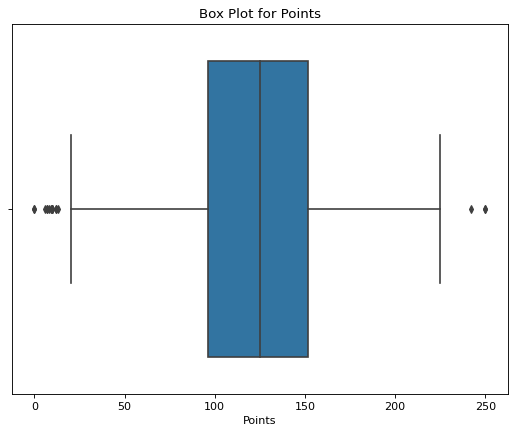

In [11]:
#boxplot visualization
figure(figsize=(8, 6), dpi=80)
sns.boxplot(df.Points)
plt.title("Box Plot for Points")

In [12]:
df.tail(100)

,Team,Points,WL,Yoga,Laps,WI,PAFS
59,Clippers,156,34.0,28.0,40.0,5.0,5.0
60,Clippers,122,37.0,29.0,44.0,5.0,2.0
61,Warriors,55,14.0,8.0,17.0,3.0,3.0
62,Warriors,60,14.0,8.0,17.0,3.0,4.0
63,Warriors,90,16.0,11.0,20.0,3.0,7.0
...,...,...,...,...,...,...,...
154,Bulls,12,12.0,12.0,13.0,1.0,NaN
155,Bulls,13,12.0,12.0,14.0,1.0,NaN
156,Bulls,12,12.0,13.0,14.0,1.0,NaN
157,Bulls,20,13.0,14.0,15.0,1.0,6.0


In [13]:
#function for plotting violin plots
def plotting_box_violin_plots(df,x,y):
  fig,axes=plt.subplots(1,2,figsize=(18,10))
  fig.suptitle("Violin and box plots for variable : {}".format(y))

  sns.violinplot(ax=axes[0],x=x,y=y,data=df)
  sns.boxplot(ax=axes[1],data=df[y])

  axes[0].set_title("Violin plot for variable : {}".format(y))
  axes[1].set_title("Box plot for variable : {}".format(y))

projectpro.checkpoint('78ae27')

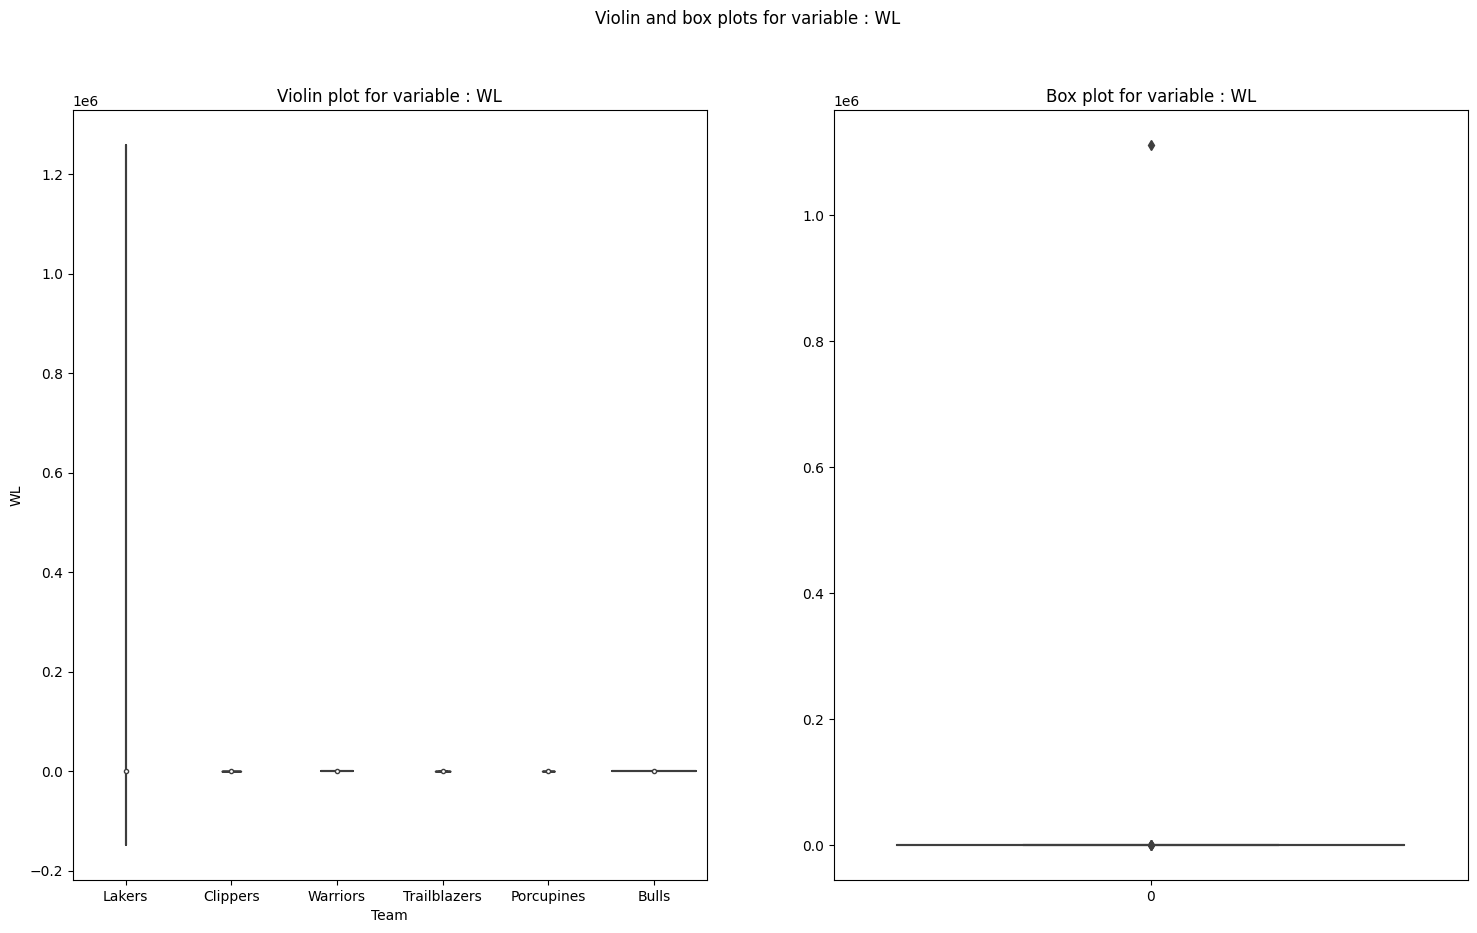

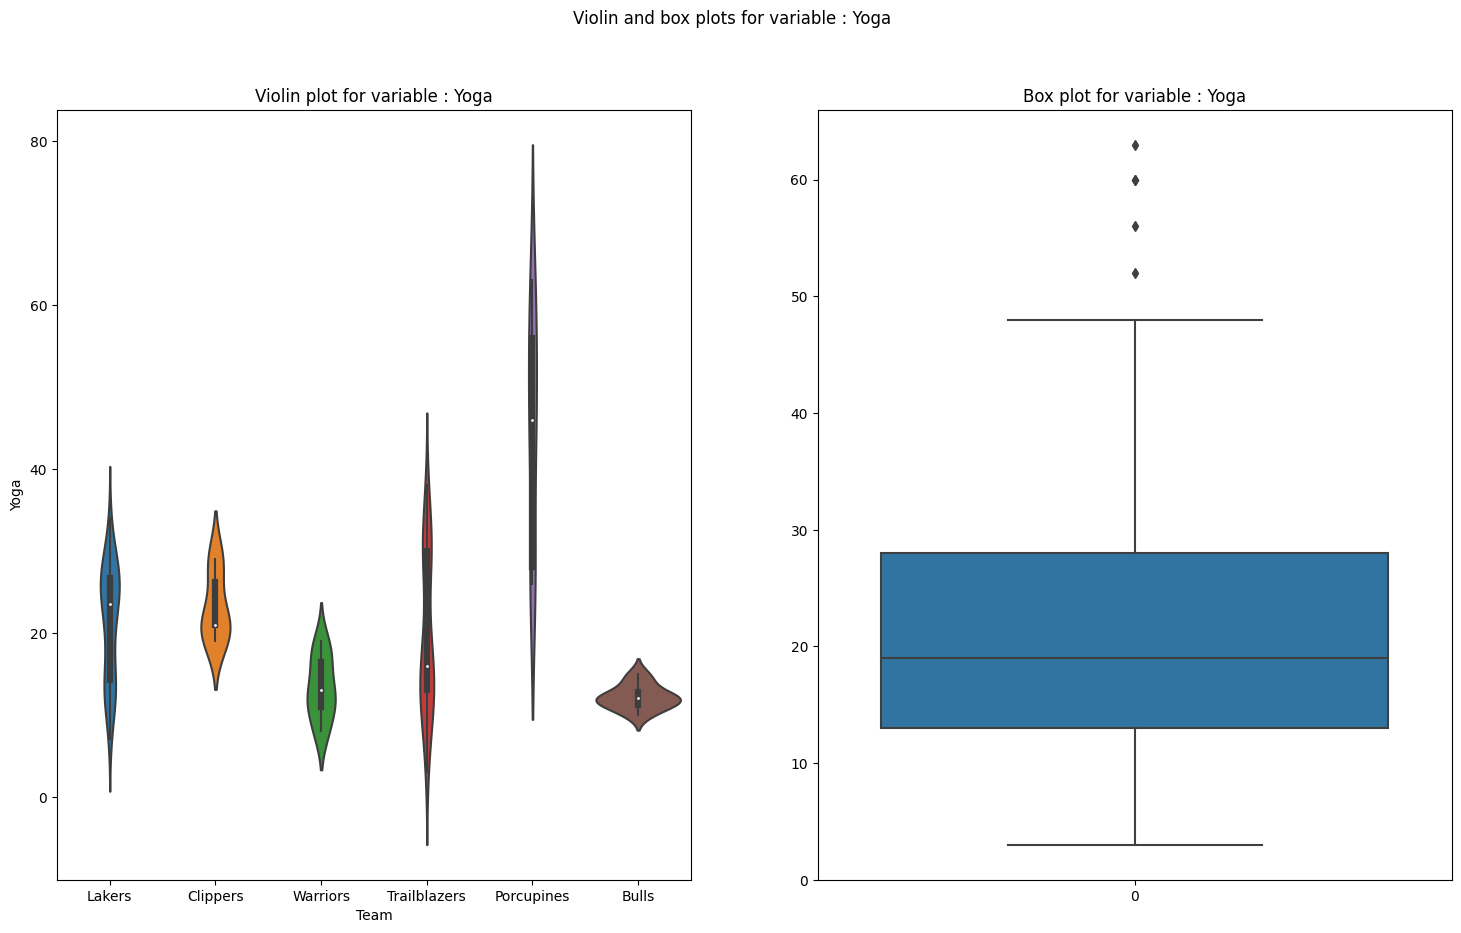

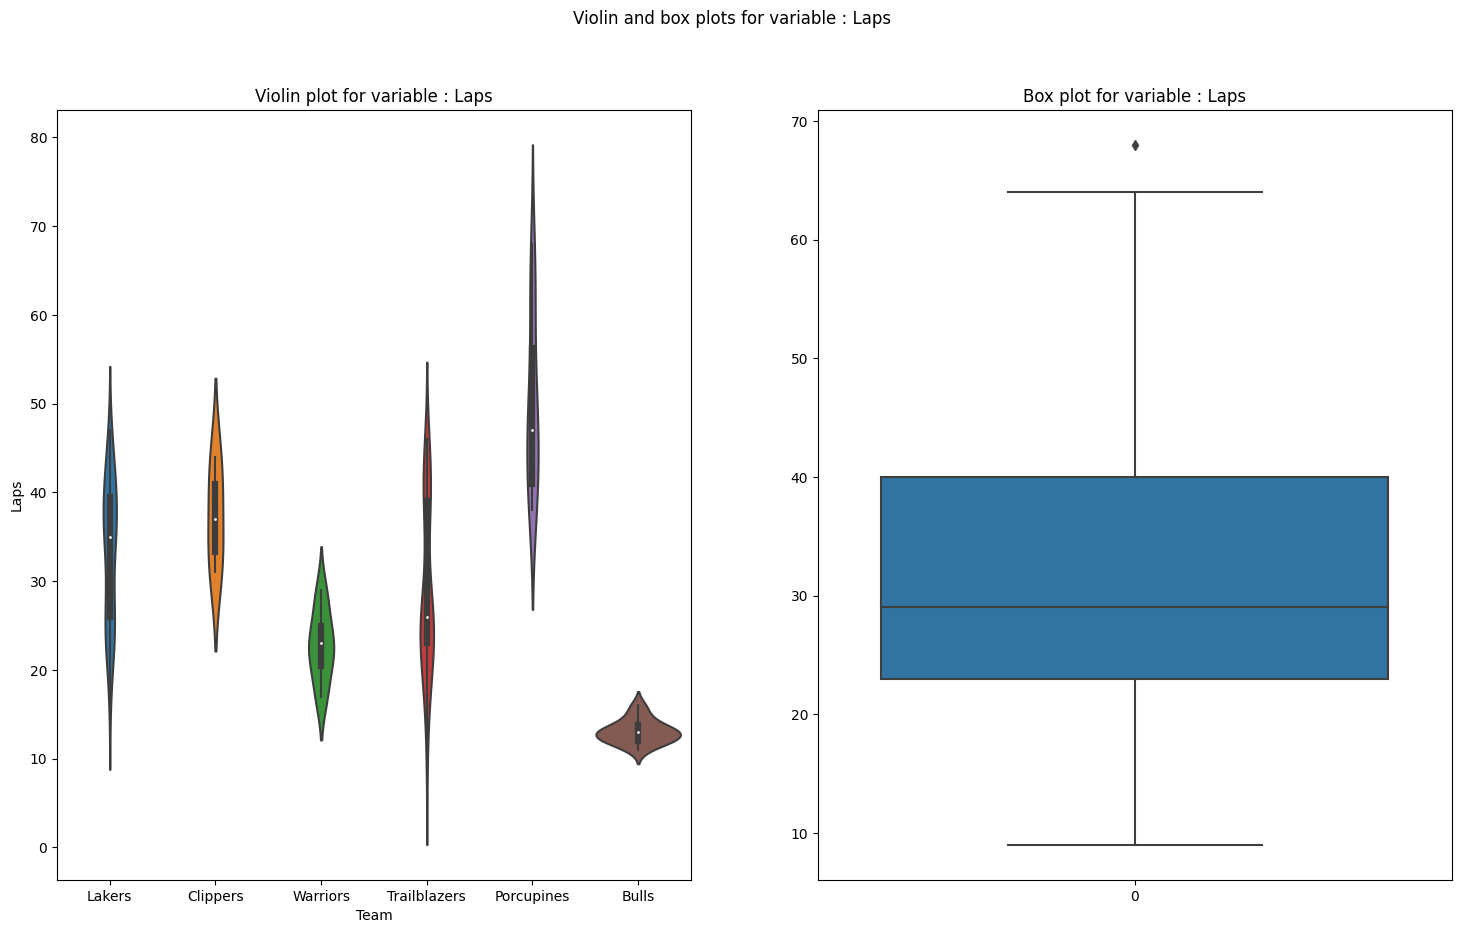

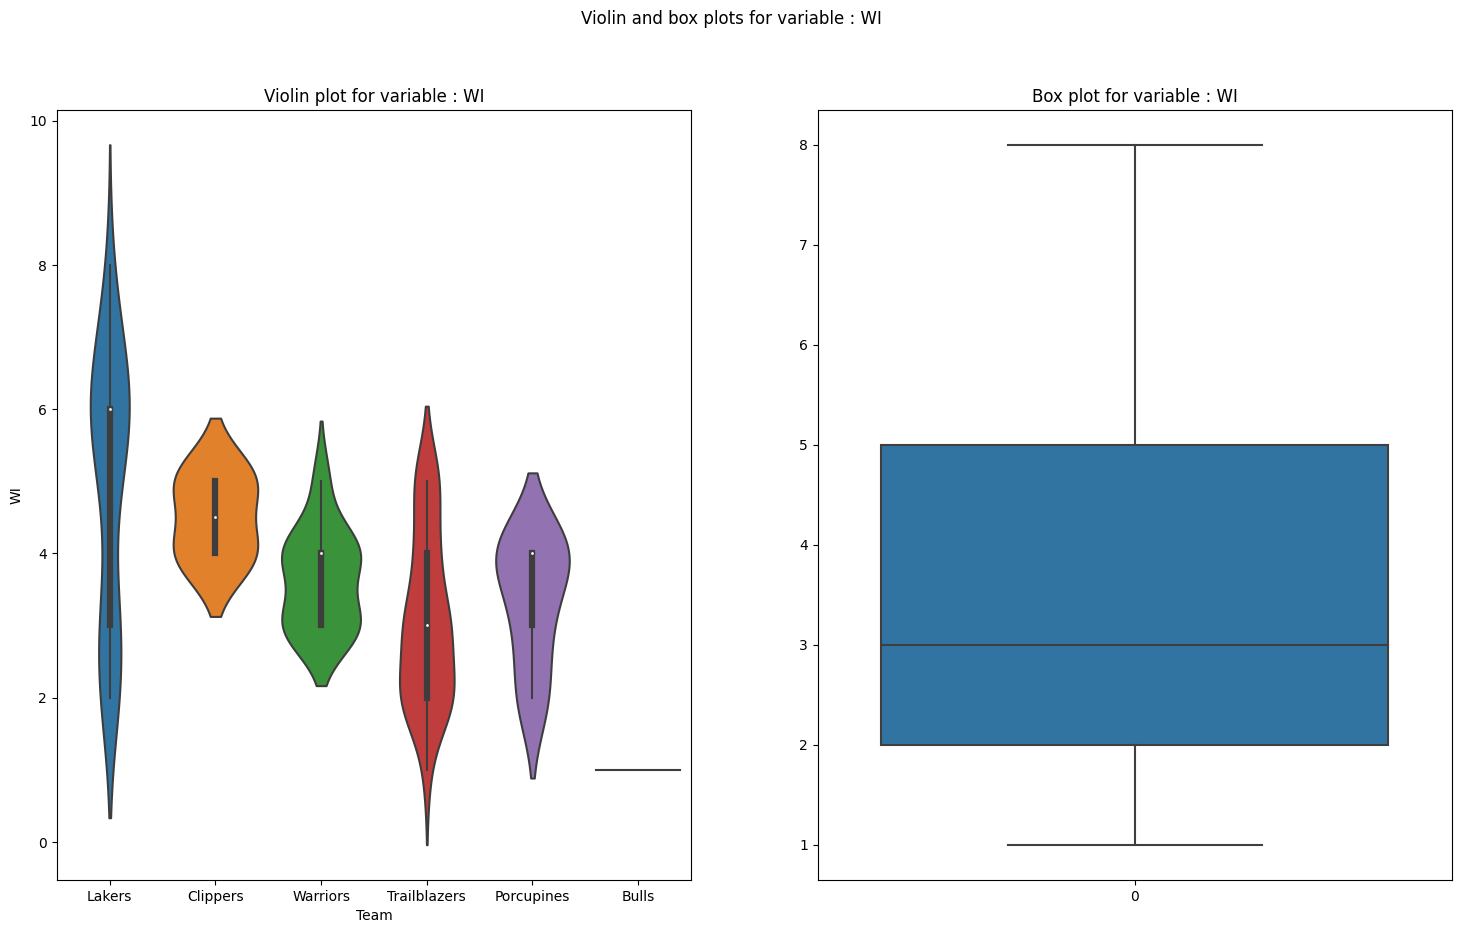

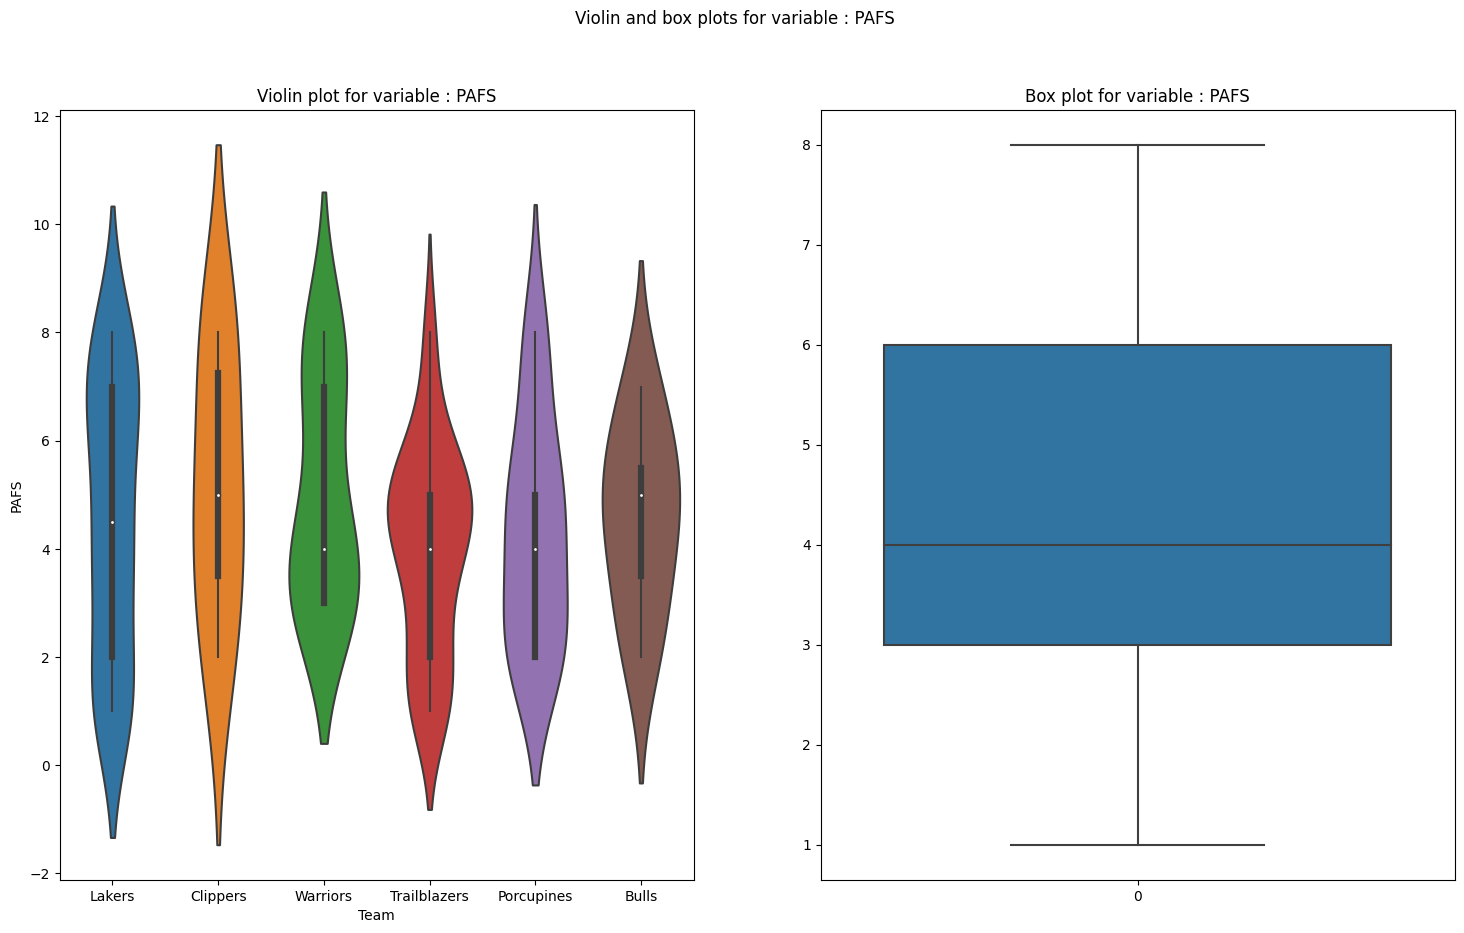

In [14]:
for x in ['WL','Yoga','Laps','WI','PAFS']:
  plotting_box_violin_plots(df,"Team",x)

In [15]:
#function for finding out outliers
def find_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  Upper_End=Q3+1.5*IQR
  Lower_End=Q1-1.5*IQR

  outlier=df[column][(df[column]>Upper_End)| (df[column]<Lower_End) ]

  return outlier

In [16]:
for column in ['WL','Yoga','Laps','WI','PAFS']:
  print('\n Outliers in column "%s"' %column)

  outlier= find_outliers(df,column)
  print(outlier)


 Outliers in column "WL"
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: WL, dtype: float64

 Outliers in column "Yoga"
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: Yoga, dtype: float64

 Outliers in column "Laps"
144    68.0
Name: Laps, dtype: float64

 Outliers in column "WI"
Series([], Name: WI, dtype: float64)

 Outliers in column "PAFS"
Series([], Name: PAFS, dtype: float64)


In [17]:
#removing outliers
df_clean=df.drop([142,143,144])

In [18]:
df_clean.shape

(156, 7)

In [19]:
df_clean['WL'][df_clean['WL']==1111111.0]=np.nan

C:\Users\vithi\AppData\Local\Temp\ipykernel_16944\2623503847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['WL'][df_clean['WL']==1111111.0]=np.nan


In [20]:
df_clean['WL']

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

In [21]:
ncounts=pd.DataFrame([df_clean.isna().mean()]).T

In [22]:
ncounts=ncounts.rename(columns={1:'data_missing'})

In [23]:
ncounts

,0
Team,0.000000
Points,0.000000
WL,0.064103
Yoga,0.128205
Laps,0.089744
WI,0.089744
PAFS,0.185897


<AxesSubplot:title={'center':'% of missing values across each column'}>

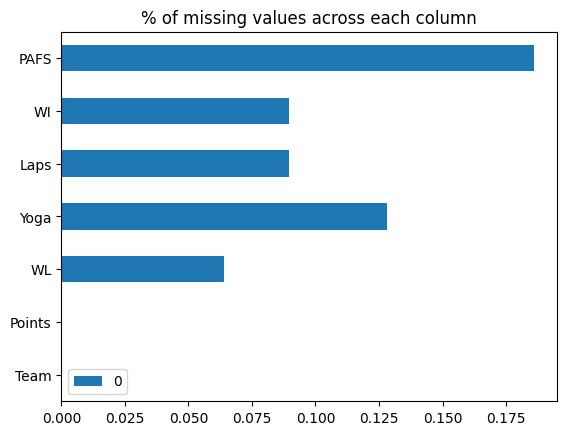

In [24]:
#plot of missing value in each column
ncounts.plot(kind='barh',title='% of missing values across each column')


In [25]:
####
# 1. Pandas Way -> F fill and B fill, groupby 
# 2. Sklearn -> Imputer -> Simple, Iterative, KNN
# 3. LGBM -> To fill in the missing values

In [26]:
df_clean.shape, df_clean.dropna(axis=0).shape

((156, 7), (94, 7))

In [27]:
df_clean.shape, df_clean.dropna(axis=1).shape

((156, 7), (156, 2))

In [28]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    156 non-null    object 
 1   Points  156 non-null    int64  
 2   WL      146 non-null    float64
 3   Yoga    136 non-null    float64
 4   Laps    142 non-null    float64
 5   WI      142 non-null    float64
 6   PAFS    127 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.8+ KB


In [29]:
#filling missing values with -1
df_clean['WL'].fillna(-1)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

d:\PROJECTS\poly_reg\polynomial_regression\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot for WL')

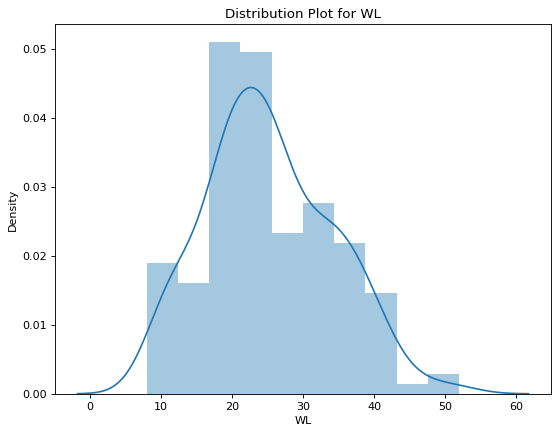

In [30]:
#visualizing after filling missing value with mean
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].mean()))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")

d:\PROJECTS\poly_reg\polynomial_regression\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot for WL')

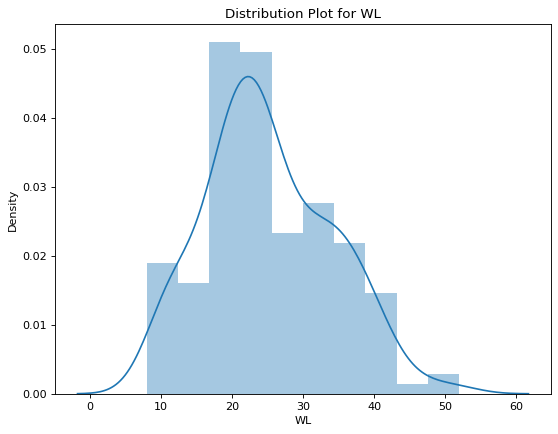

In [31]:
#visualizing after filling missing value with median
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].median()))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")
projectpro.checkpoint('78ae27')

In [32]:
#Groupby team
mean_WL=df_clean.groupby("Team")['WL'].mean().to_dict()

In [33]:
mean_WL

{'Bulls': 11.214285714285714,
 'Clippers': 29.0,
 'Lakers': 26.04255319148936,
 'Porcupines': 39.42857142857143,
 'Trailblazers': 25.425925925925927,
 'Warriors': 18.727272727272727}

In [34]:
for index, row in df_clean.iterrows():
    team = row['Team']
    if pd.isna(row['WL']):
        mean_value = mean_WL.get(team)
        df_clean.at[index, 'WL'] = mean_value

d:\PROJECTS\poly_reg\polynomial_regression\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution Plot for WL')

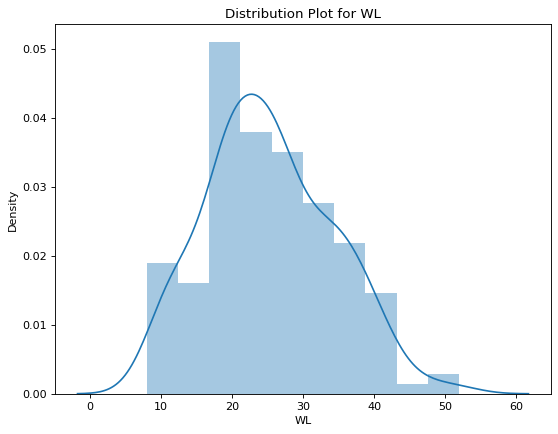

In [35]:
figure(figsize=(8, 6), dpi=80)
sns.distplot(df_clean['WL'].replace(mean_WL))
plt.xlabel("WL")
plt.ylabel("Density")
plt.title("Distribution Plot for WL")

In [36]:
df_clean['WL'].replace(mean_WL)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

In [37]:
#you can use this function too fillna
df_clean['WL']=df_clean.groupby('Team')['WL'].transform(lambda x:x.fillna(x.mean()))

In [38]:
# 1 Simple Imputer

Features=['WL','Yoga','Laps','WI','PAFS']

from sklearn.impute import SimpleImputer
impt=SimpleImputer(strategy='mean')

#Fit & Transform

si_impt=impt.fit_transform(df_clean[Features])
si_impt_df=pd.DataFrame(si_impt,columns=Features)

si_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,20.823529,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.417323
152,12.0,12.000000,14.0,1.0,4.417323
153,12.0,13.000000,14.0,1.0,4.417323
154,13.0,14.000000,15.0,1.0,6.000000


In [39]:
ITI=IterativeImputer(max_iter=10)

#Fit & Transform

ITI_impt=ITI.fit_transform(df_clean[Features])

ITI_impt_df=pd.DataFrame(ITI_impt,columns=Features)

ITI_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.462586,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.411891
152,12.0,12.000000,14.0,1.0,4.412035
153,12.0,13.000000,14.0,1.0,4.412172
154,13.0,14.000000,15.0,1.0,6.000000


In [40]:
# KNN Imputer 

from sklearn.impute import KNNImputer

KNN=KNNImputer(n_neighbors=3)

#Fit & Transform

KNN_impt=KNN.fit_transform(df_clean[Features])

KNN_impt_df=pd.DataFrame(KNN_impt,columns=Features)

KNN_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.666667,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.666667
152,12.0,12.000000,14.0,1.0,5.333333
153,12.0,13.000000,14.0,1.0,6.000000
154,13.0,14.000000,15.0,1.0,6.000000


In [43]:
from kuma_utils.preprocessing.imputer import LGBMImputer

In [44]:
%%time
lgbm_itr=LGBMImputer(n_iter=100,verbose=True)

df_itr=lgbm_itr.fit_transform(df_clean[Features])


df_itr_df=pd.DataFrame(df_itr,columns=Features)

  0%|          | 0/4 [00:00<?, ?it/s]

CPU times: total: 453 ms
Wall time: 123 ms


d:\PROJECTS\poly_reg\polynomial_regression\env\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
d:\PROJECTS\poly_reg\polynomial_regression\env\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [45]:
df_itr_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,24.037313,34.0,5.0,6.000000
...,...,...,...,...,...
154,12.0,12.000000,13.0,1.0,3.697231
155,12.0,12.000000,14.0,1.0,3.697231
156,12.0,13.000000,14.0,1.0,3.949597
157,13.0,14.000000,15.0,1.0,6.000000


In [51]:
df_new=df_itr_df

In [52]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

<AxesSubplot:xlabel='WL', ylabel='Density'>

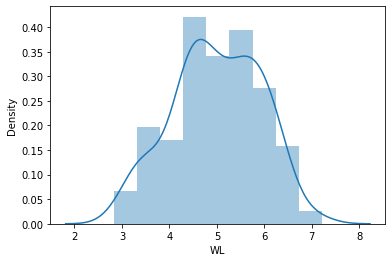

In [53]:
#distribution plot
sns.distplot(np.sqrt(df_new["WL"]))

<AxesSubplot:xlabel='WL'>

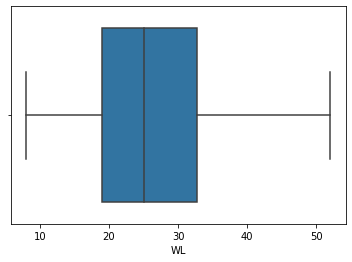

In [54]:
#boxplot
sns.boxplot(df_new["WL"])

<AxesSubplot:>

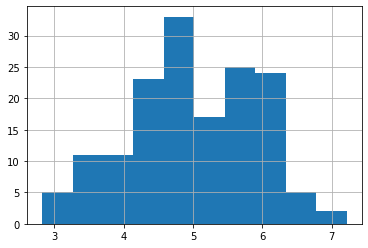

In [55]:
#histogram plot
np.sqrt(df_new["WL"]).hist()

<AxesSubplot:>

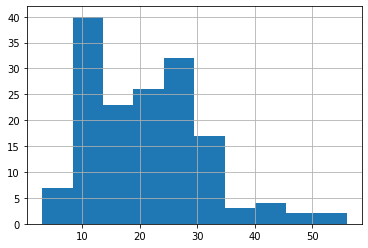

In [56]:
###Yoga

df_new["Yoga"].hist()

<AxesSubplot:xlabel='Yoga', ylabel='Density'>

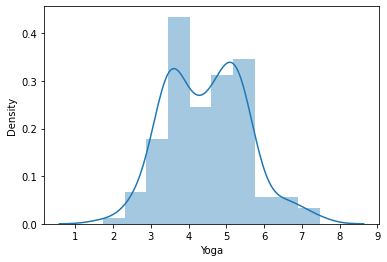

In [57]:
#distribution plot 
sns.distplot(np.sqrt(df_new["Yoga"]))

<AxesSubplot:xlabel='PAFS', ylabel='Density'>

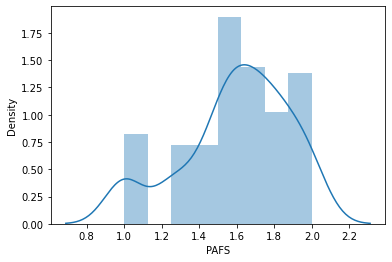

In [58]:
#distrribution plot
sns.distplot(np.cbrt(df_new["PAFS"]))

In [59]:
##Bivariate Analysis

## 1 Linear Correlation --> Pearson Corelation

df_clean.shape,df_new.shape

((156, 7), (156, 5))

In [60]:
df_clean.columns

Index(['Team', 'Points', 'WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [61]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [62]:
df_new["Points"]=df_clean['Points']
df_new["Team"]=df_clean['Team']
projectpro.checkpoint('78ae27')


#### **Graphs of Different Correlation Coefficients**
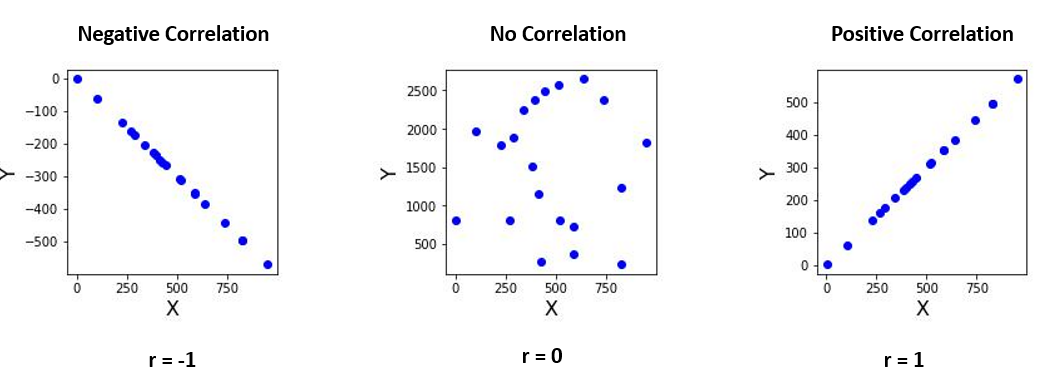

1. $r = -1$ indicates a perfect negative relationship between the variables 

2. $r = 0$ indicates no relationship between the variables

3. $r = 1$ indicates a perfect positive relationship between the variables



In [63]:
#corerelation matrix
df_new.corr()

,WL,Yoga,Laps,WI,PAFS,Points
WL,1.000000,0.940899,0.989656,0.716546,0.001012,0.448556
Yoga,0.940899,1.000000,0.927862,0.617798,0.026512,0.343593
Laps,0.989656,0.927862,1.000000,0.776036,0.024935,0.479233
WI,0.716546,0.617798,0.776036,1.000000,0.129837,0.425148
PAFS,0.001012,0.026512,0.024935,0.129837,1.000000,0.048566
Points,0.448556,0.343593,0.479233,0.425148,0.048566,1.000000


Text(0.5, 1.0, 'Linear Correlation Matrix')

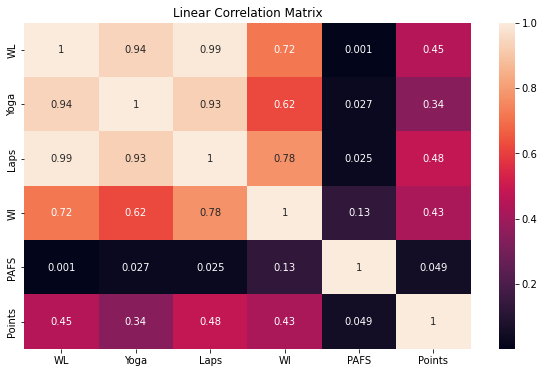

In [64]:
plt.rcParams["figure.figsize"]=(10,6)

#heatmap of correlation matrix
sns.heatmap(df_new.corr(),annot=True)

plt.title("Linear Correlation Matrix")

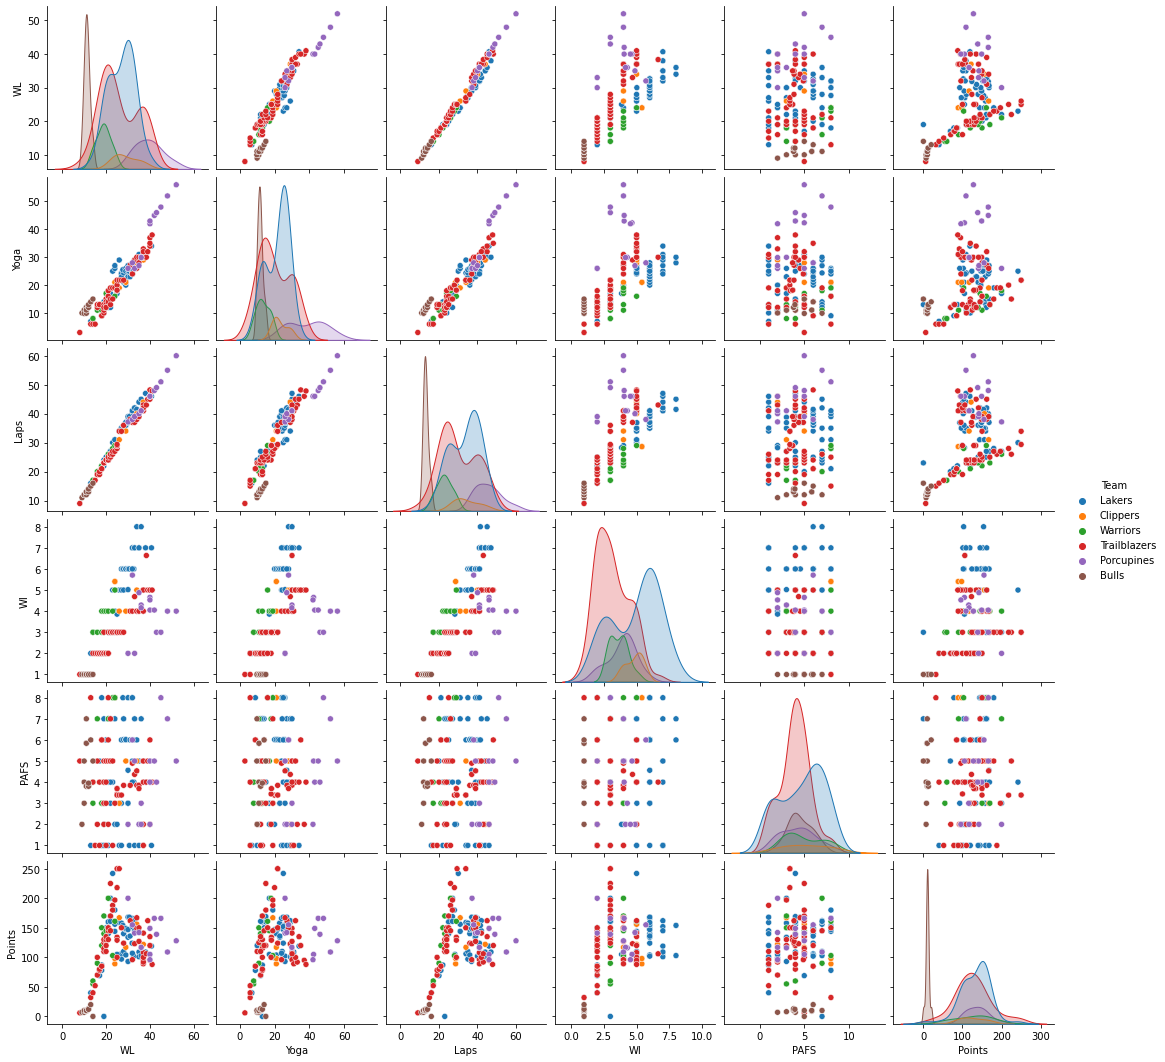

In [65]:
#pairplot of the data
sns.pairplot(df_new,kind='scatter',hue='Team')

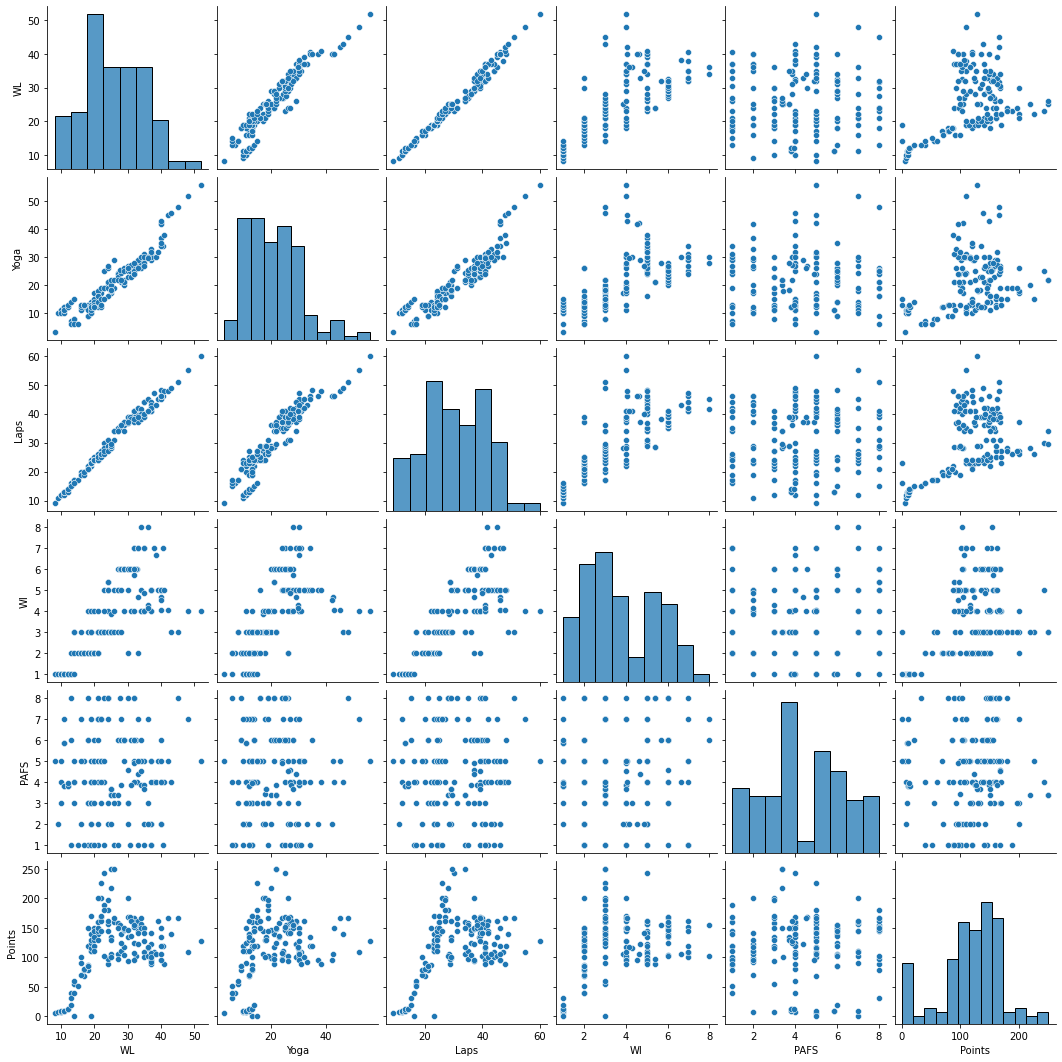

In [66]:
#scatter pairplot
sns.pairplot(df_new,kind='scatter')

In [67]:
#function for finding chatterejee correlation coefficient
def chatterjee_corr(df,x,y):
  N=df.shape[0]
  df_rank=df

  df_rank['rank']=df_rank[y].rank()
  #print(df_rank['rank'])

  df_rank['rank_x']=df_rank[x].rank()

  df_rank=df_rank.sort_values(by='rank_x')

  #1-3*(abs(sum(xri-1 - Xir))/n square-1

  #Diff function --> summation -> absolute

  chatt_corr=1- (3*df_rank['rank'].diff().abs().sum() )/ (pow(N,2)-1)

  return chatt_corr
projectpro.checkpoint('78ae27')

In [68]:
chatterjee_corr(df_new,'WL','Points')

0.4062872405999589

In [69]:
chatterjee_corr(df_new,'WI','Points')

0.39198685021573865

In [70]:
chatterjee_corr(df_new,'Laps','Points')

0.4229299363057325

In [71]:
chatterjee_corr(df_new,'PAFS','Points')

0.0019930141771111742

In [72]:
chatterjee_corr(df_new,'Yoga','Points')

0.2911444421614958

In [73]:
# determining whether team essentially affects the points variable for the dataset


In [74]:
import random

nba_id=list(df_new.index.unique())

random.seed(13)

In [75]:
sample_match_id=random.sample(nba_id,50)

In [76]:
sample_df=df_new[df_new.index.isin(sample_match_id)].reset_index(drop=True)

In [77]:
sample_df=sample_df[['Team','Points']]

groups=sample_df.groupby('Team').count().reset_index()

In [78]:
groups

,Team,Points
0,Bulls,5
1,Clippers,4
2,Lakers,14
3,Porcupines,3
4,Trailblazers,20
5,Warriors,4


In [79]:
##Normality

import scipy.stats as stats

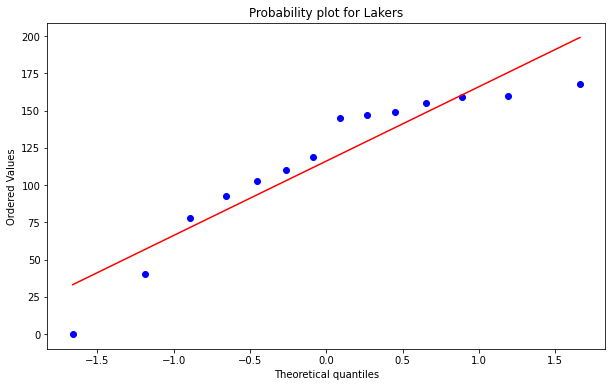

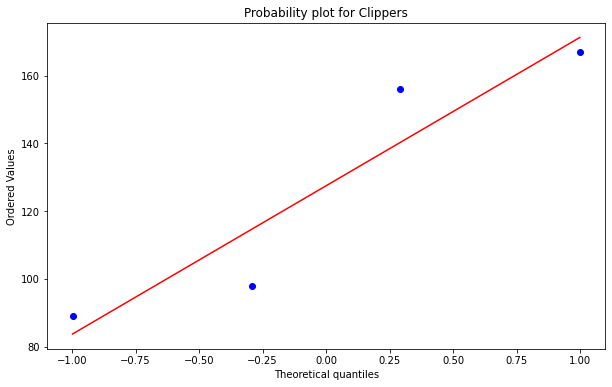

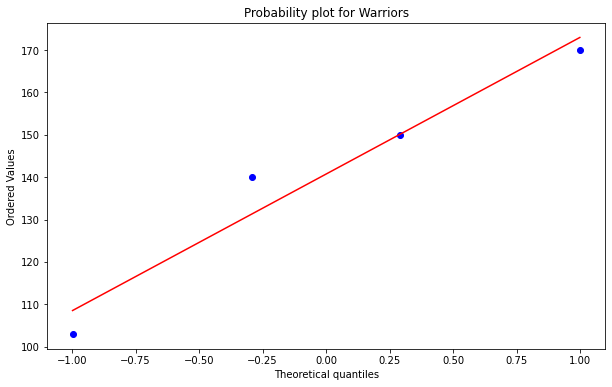

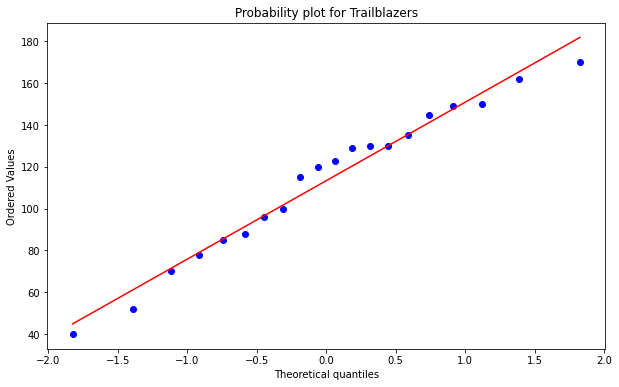

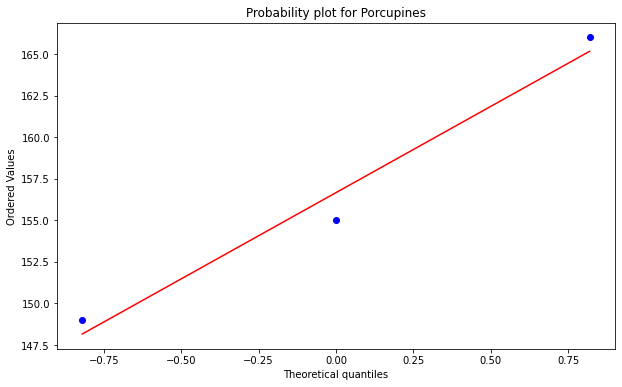

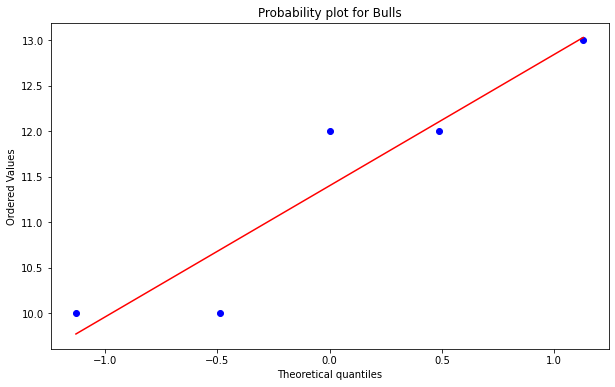

In [80]:
unique_teams=sample_df['Team'].unique()
#quantile quantile plots
for i in unique_teams:
  stats.probplot(sample_df[sample_df['Team']==i]['Points'],dist='norm',plot=plt)
  plt.title('Probability plot for '+ i)
  plt.show()

In [81]:
ratio=sample_df.groupby('Team').std().max()/sample_df.groupby('Team').std().min()
ratio

Points    37.164289
dtype: float64

In [82]:
#implement anova from scratch

data=[['Between Groups','','','','','',''],['Within Groups','','','','','',''],['Total','','','','','','']]

anova_table=pd.DataFrame(data,columns=['Variation','SS','df','MS','F value','P value','F critical'])

anova_table.set_index('Variation',inplace=True)

In [83]:
x_bar=sample_df['Points'].mean()

#porcupines - 2 overall 10 8  
SSTR=sample_df.groupby('Team').count()*(sample_df.groupby('Team').mean()-x_bar)**2

In [84]:
anova_table['SS']['Between Groups']=SSTR['Points'].sum()

In [85]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,,,,,
Within Groups,,,,,,
Total,,,,,,


In [86]:
SSE=(sample_df.groupby('Team').count()-1)*sample_df.groupby('Team').std()**2

In [87]:
SSE

,Points
Team,
Bulls,7.200000
Clippers,4725.000000
Lakers,32319.714286
Porcupines,148.666667
Trailblazers,24798.550000
Warriors,2366.750000


In [88]:
anova_table['SS']['Within Groups']=SSE['Points'].sum()

In [89]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,,,,,
Within Groups,64365.880952,,,,,
Total,,,,,,


In [90]:
total=SSE['Points'].sum()+SSTR['Points'].sum()

In [91]:
anova_table['SS']['Total']=total

In [92]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,,,,,
Within Groups,64365.880952,,,,,
Total,125268.02,,,,,


In [93]:
anova_table['df']['Between Groups']=sample_df['Team'].nunique()-1
anova_table['df']['Within Groups']=sample_df.shape[0]-sample_df['Team'].nunique()
anova_table['df']['Total']=sample_df.shape[0]-1

In [94]:
anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,5,,,,
Within Groups,64365.880952,44,,,,
Total,125268.02,49,,,,


In [95]:
anova_table['MS']=anova_table['SS']/anova_table['df']
anova_table['F value']['Between Groups']=anova_table['MS']['Between Groups']/anova_table['MS']['Within Groups']

anova_table['P value']['Between Groups']=1-stats.f.cdf(anova_table['F value']['Between Groups'],
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,5,12180.42781,8.326443,0.000013,
Within Groups,64365.880952,44,1462.860931,,,
Total,125268.02,49,2556.490204,,,


In [96]:
alpha=0.05

hypothesis_type="two tailed"

if hypothesis_type=="two tailed":
  alpha=alpha/2


anova_table['F critical']['Between Groups']=stats.f.ppf(1-alpha,
                                                        anova_table['df']['Between Groups'],
                                                        anova_table['df']['Within Groups'])

anova_table

,SS,df,MS,F value,P value,F critical
Variation,,,,,,
Between Groups,60902.139048,5,12180.42781,8.326443,0.000013,2.871184
Within Groups,64365.880952,44,1462.860931,,,
Total,125268.02,49,2556.490204,,,


In [97]:
# Pvalue approach

print("Approach for P value ")

conclusion="Failed to reject null hypothesis"

if anova_table['P value']['Between Groups']<=alpha:
  conclusion="Null hypothesis is rejected"

print("F value for the table is ", anova_table['F value']['Between Groups'],"and p value is ",anova_table['P value']['Between Groups'] )

print(conclusion)

Approach for P value 
F value for the table is  8.326442762673361 and p value is  1.3292810565279645e-05
Null hypothesis is rejected


In [98]:
# Fcritical approach

print("Approach for F critical ")

conclusion="Failed to reject null hypothesis"

if anova_table['F value']['Between Groups']>anova_table['F critical']['Between Groups']:
  conclusion="Null hypothesis is rejected"

print("F value for the table is ", anova_table['F value']['Between Groups'],"and F critical value is ",anova_table['F critical']['Between Groups'] )

print(conclusion)

Approach for F critical 
F value for the table is  8.326442762673361 and F critical value is  2.871183837102218
Null hypothesis is rejected


In [99]:
## Processing data for modelling
#one hot encoding
one_hot_df=pd.get_dummies(df_clean,columns=['Team'],drop_first=True)

In [100]:
X=one_hot_df[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers',
       'Team_Lakers', 'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]

y=one_hot_df['Points']

#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

print("X train dimension is ",X_train.shape)
print("y train dimension is ",y_train.shape)
print("X test dimension is ",X_test.shape)
print("y test dimension is ",y_test.shape)
projectpro.checkpoint('78ae27')

X train dimension is  (124, 10)
y train dimension is  (124,)
X test dimension is  (32, 10)
y test dimension is  (32,)


In [101]:
#Start Imputing here

imputer=LGBMImputer(n_iter=15,verbose=True)

X_train_full=imputer.fit_transform(X_train)

X_train_clean=pd.DataFrame(X_train_full,columns=X_train.columns)

X_train_clean.head()

  0%|          | 0/5 [00:00<?, ?it/s]

,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
85,19.0,12.000000,23.000000,3.0,3.000000,0,0,0,1,0
104,25.0,22.605504,29.000000,3.0,4.383336,0,0,0,1,0
105,25.0,22.429754,28.832621,3.0,4.588605,0,0,0,1,0
65,18.0,11.000000,22.000000,4.0,3.000000,0,0,0,0,1
149,11.0,12.504986,12.000000,1.0,7.000000,0,0,0,0,0


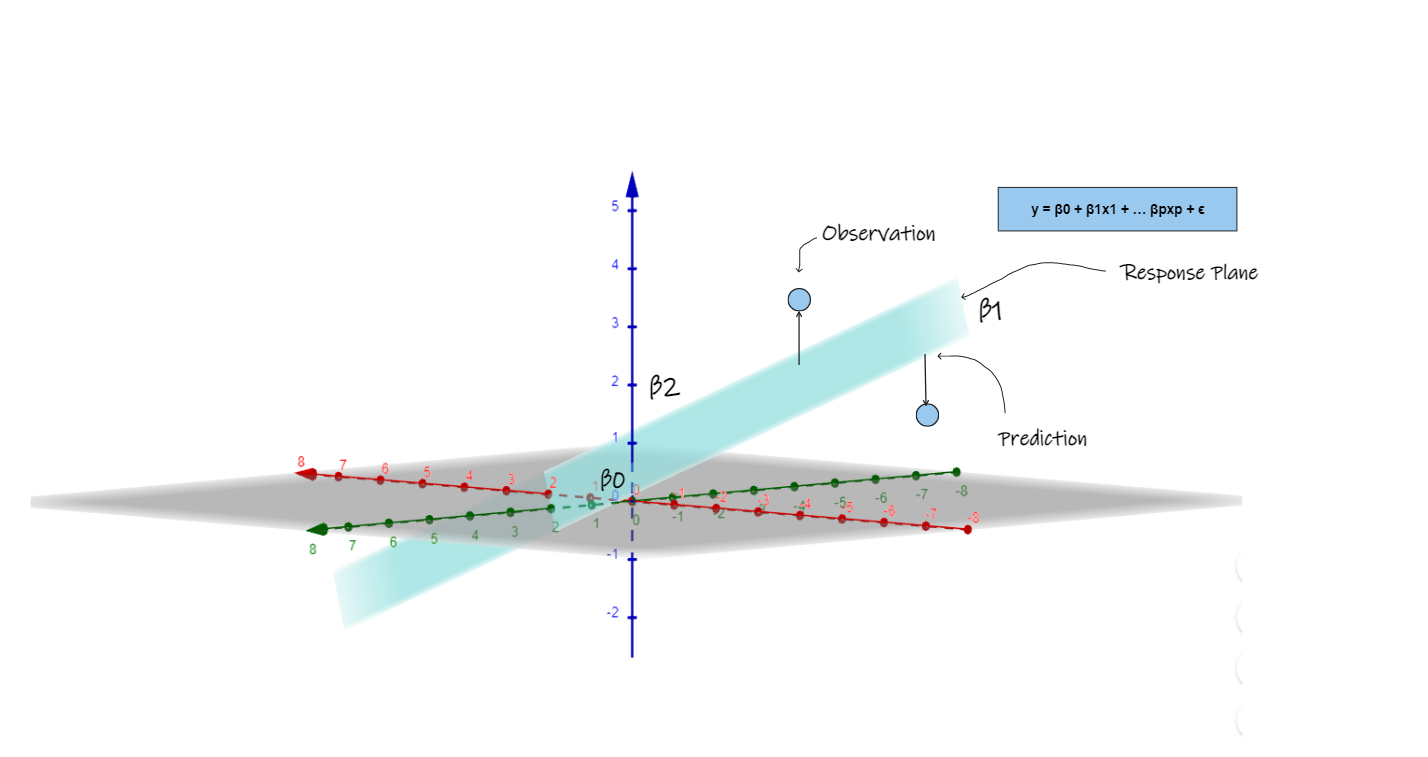

In [102]:
result=sm.OLS(y_train,X_train_clean).fit()

In [103]:
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Points   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              112.6
Date:                Thu, 16 Feb 2023   Prob (F-statistic):                    2.91e-54
Time:                        08:08:07   Log-Likelihood:                         -632.57
No. Observations:                 124   AIC:                                      1285.
Df Residuals:                     114   BIC:                                      1313.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [104]:
X_const=sm.add_constant(X_train_clean)

result=sm.OLS(y_train,X_const).fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     8.653
Date:                Thu, 16 Feb 2023   Prob (F-statistic):           2.19e-10
Time:                        08:08:09   Log-Likelihood:                -632.52
No. Observations:                 124   AIC:                             1287.
Df Residuals:                     113   BIC:                             1318.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -5.0449     18.24

In [105]:
X_test

,WL,Yoga,Laps,WI,PAFS,Team_Clippers,Team_Lakers,Team_Porcupines,Team_Trailblazers,Team_Warriors
31,35.0,29.0,44.0,7.0,1.0,0,1,0,0,0
127,41.0,38.0,NaN,5.0,4.0,0,0,0,1,0
39,19.0,14.0,22.0,2.0,4.0,0,1,0,0,0
8,NaN,NaN,35.0,6.0,8.0,0,1,0,0,0
63,16.0,11.0,20.0,3.0,7.0,0,0,0,0,1
145,9.0,10.0,11.0,1.0,2.0,0,0,0,0,0
133,36.0,NaN,41.0,NaN,2.0,0,0,1,0,0
148,10.0,NaN,12.0,1.0,5.0,0,0,0,0,0
156,12.0,13.0,14.0,1.0,NaN,0,0,0,0,0
112,34.0,26.0,39.0,4.0,NaN,0,0,0,1,0


In [106]:
test=pd.DataFrame(imputer.transform(X_test))

  0%|          | 0/5 [00:00<?, ?it/s]

In [107]:
res=result.predict(sm.add_constant(test[['WL', 'Yoga', 'Laps', 'WI', 'PAFS', 'Team_Clippers', 'Team_Lakers',
       'Team_Porcupines', 'Team_Trailblazers', 'Team_Warriors']]))

In [108]:
print("MAE of the model is",mean_absolute_error(y_test,res))

MAE of the model is 21.769184876970705


In [109]:
print("MSE of the model is",mean_squared_error(y_test,res))

MSE of the model is 852.9118303436447


In [110]:
print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,res)))

RMSE of the model is 29.20465425824529


In [111]:
print("R2 score for test is",metrics.r2_score(y_test,res))

R2 score for test is 0.6768886118157907


Text(0.5, 1.0, 'Polynomial Regression Example')

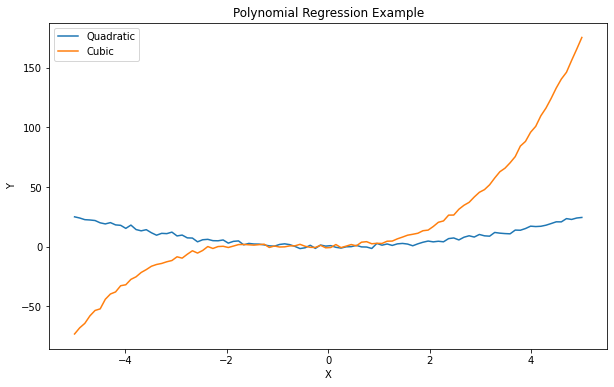

In [112]:
x = np.linspace(-5, 5, 100)
y = x**2  + np.random.normal(0, 1, 100)
y_cubic = x**3 + 2*x**2 + np.random.normal(0, 1, 100)


# Plotting the data
plt.plot(x, y, label='Quadratic')
plt.plot(x, y_cubic, label='Cubic')
plt.legend(loc='best')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression Example')

In [113]:
#Line is not a good fit and so we are going for polynomials
# We will create a line as well as a polynomial for comparison

#numpy.polyfit
# numpy.linespace -> create space and plot values -> Space creation using args
# numpy.poly1d -> To create the polynomial equation 

In [114]:
def create_polynomial_plot(feature,label):
  #convert to 1d
  x_coordinates=feature
  y_coordinates=np.squeeze(label)

  linear_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,1))
  quadratic_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,2))
  cubic_poly=np.poly1d(np.polyfit(x_coordinates,y_coordinates,3))


  values=np.linspace(x_coordinates.min(),x_coordinates.max(),len(x_coordinates))
  plt.scatter(x_coordinates,y_coordinates,color='blue')
  plt.plot(values,linear_poly(values),color='cyan',label='Linear Model')
  plt.plot(values,quadratic_poly(values),color='red',label='Quadratic Model')
  plt.plot(values,cubic_poly(values),color='yellow',label='Cubic Model')

  plt.xlabel("%s from data" %(feature.name))
  plt.ylabel("Points")

  plt.rcParams["figure.figsize"]=(12,6)

  plt.legend()
  plt.title("Linear vs Quadratic")

  plt.show()


  


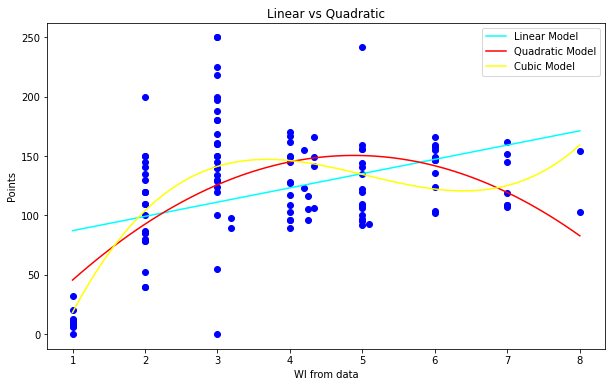

In [115]:
create_polynomial_plot(X_train_clean.WI,y_train)

In [116]:
########
#1 Create a set of polynomial features

#2 Apply a linear regression 
########

In [117]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(X_train_clean)

poly.fit(X_poly,y_train)

PolynomialFeatures()

In [118]:
from sklearn import linear_model

lm=linear_model.LinearRegression()

lm.fit(X_poly,y_train)
projectpro.checkpoint('78ae27')

LinearRegression()

In [ ]:
#Doing predictions on test data

predictions=lm.predict(poly.fit_transform(test))

print("R2 score for test is",metrics.r2_score(y_test,predictions))

In [ ]:
print("RMSE of the model is",np.sqrt(mean_squared_error(y_test,predictions)))

In [ ]:
#Degree 1 --> RMSE - 47.4 R2 - 0.23
#Degree 2 --> RMSE - 39.8 R2 - 0.45
#Degree 3 --> RMSE - 297 R2 - -29

In [ ]:
#You can also use below function for polynomial regression
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
# pp=Pipeline([
#     ('poly',PolynomialFeatures(degree=2)),
#     ('model',LinearRegression())
# ])

# pp.fit(X_train_clean,y_train)
# y_pred=pp.predict(test)